<center><font size=4 style="color:#BA4A00"><strong>客户聚类分析</strong></font></center>

## 1. 导入数据和所需的库

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

使用`pandas`读取数据并查看数据

In [2]:
customer_data = pd.read_csv('./data/ShoppingData.csv')

## 2. 查看数据内容

In [3]:
# 查看数据维度
customer_data.shape

(200, 5)

数据集中共有200条客户记录，用5个维度来刻画每一位客户。

In [4]:
# 查看数据样例
customer_data.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

每条用户数据有五个属性：ID，性别，年龄，年收入，消费分

为了在二维特征空间中可视化聚类结果，本例只使用年收入和消费分属性

In [5]:
# 删除其余三列属性
data = customer_data.iloc[:, 3:5].values

In [6]:
data.shape

(200, 2)

In [7]:
# 数据类型为numpy数组
type(data)

numpy.ndarray

为便于确定类簇数$k$，先将数据点在二维平面进行可视化，为寻找$k$提供直觉依据。

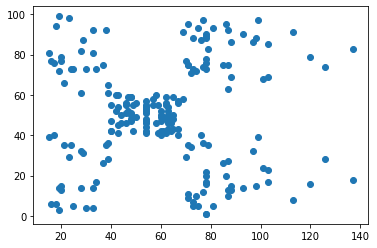

In [8]:
plt.scatter(data[:,0],data[:,1])

由上图可以看出，将类簇数设置为$k=5$是一个合理的选择。

## 3. 聚类分析

下面使用scikit-learn中的K-means模型对客户数据点进行聚类，并为每个数据点分配类簇标签

In [9]:
# 使用help函数查看k_means函数的具体用法和各参数含义
# help(k_means)

In [10]:
from sklearn.cluster import k_means

clusters = k_means(data,n_clusters=5)

聚类结果返回一个元组(tuple)，第一个元素为类簇中心，第二个元素为每个数据点对应的类簇标签

In [11]:
# 查看clusters的数据类型
type(clusters)

tuple

In [12]:
# 查看元组第一个元素的维度
clusters[0].shape

(5, 2)

In [13]:
# 五个类簇的中心
clusters[0]

array([[86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852]])

In [14]:
# 查看元组第二个元素的维度
clusters[1].shape

(200,)

In [15]:
# 查看每个数据点的类簇标签
clusters[1]

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4,
       1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 4, 0, 2, 0, 2, 0,
       4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

此处的类簇标签只是表示类簇的一个符号，并不具备任何含义，需要进一步分析每个类簇中数据点的特征，来为每个类簇赋予有意义的解释。

## 4. 结果分析

将数据点按照聚类结果绘制在二维平面上，为不同类簇的数据点着不同的颜色，横轴表示年收入，纵轴表示消费分

Text(0, 0.5, 'Spending Score')

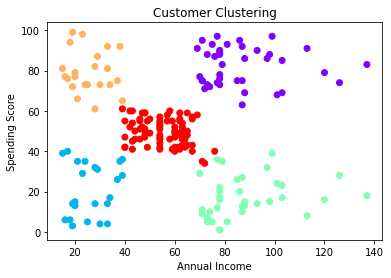

In [16]:
plt.scatter(data[:,0],data[:,1], c=clusters[1], cmap='rainbow')
plt.title("Customer Clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

从上图可以看到5种颜色的客户数据点代表5个不同的类簇，进一步分析年收入和消费分两个维度可知，5个类簇对应5种不同特征的消费群体。

- 左下角的客户群体收入低，消费低；

- 左上角的客户群体收入低，消费高；

- 右上角的客户群体收入高，消费高，是企业的现金牛客户，也是需要用心维系商业关系的大客户；

- 右下角的客户群体收入高，消费低，这类客户具有消费能力，需要有针对性地进行营销，激发其消费潜力；

- 正中间的客户群体收入中，消费中，且数据点众多，这类客户是企业的主要客户群体，需要积极维护客户关系，保持其持续的消费动力。